# Problem statement 3:
- Integrate real-time weather features into the model

In [6]:
import numpy as np

In [1]:
import pandas as pd


demand_matrix = pd.read_csv(r"demand_matrix_for_demand_prediction_with_timestamp.csv")
adj_matrix    = pd.read_csv(r"adj_matrix_for_demand_prediction_final.csv")

In [2]:
print(demand_matrix.shape)  # should be (778, 263)
print(adj_matrix.shape) 

(778, 264)
(263, 263)


In [3]:
demand_matrix

,time_slot,1,2,3,4,5,6,7,8,9,...,254,255,256,257,258,259,260,261,262,263
0,2024-12-25 23:00:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-12-29 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,2025-02-04 21:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,2025-02-05 14:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,2025-02-05 15:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
776,2025-02-05 17:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
weather = pd.read_csv(r"C:\Users\Dell\Downloads\weather_data_dec2024_feb2025_NYC.csv")

In [5]:
weather

,timestamp,avg_temp_c,feels_like_c,dew_point_c,rel_humidity_pct,cloud_cover_pct,visibility_km,precip_mm,snowfall_cm,wind_speed_kmh,wind_gust_kmh,sea_level_pressure_mb
0,2024-12-01 00:00:00,5.91,6.20,4.63,61.8,77.0,12.1,0.00,0.0,10.6,15.9,1010.5
1,2024-12-01 01:00:00,1.87,2.79,-0.23,55.1,98.3,10.3,0.00,0.0,15.8,21.4,1028.8
2,2024-12-01 02:00:00,7.23,4.78,6.73,59.9,40.4,10.4,0.00,0.0,21.8,31.8,1020.4
3,2024-12-01 03:00:00,7.79,6.34,5.68,90.9,9.1,10.3,0.00,0.0,22.2,28.6,1016.1
4,2024-12-01 04:00:00,-0.89,-2.30,-1.96,74.9,67.5,10.6,0.00,0.0,8.3,14.9,1029.7
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,2025-02-28 19:00:00,5.79,5.37,4.66,68.4,24.1,8.7,0.17,0.0,15.2,21.6,1021.0
2156,2025-02-28 20:00:00,4.99,3.57,3.03,68.3,45.5,15.4,0.00,0.0,11.2,19.2,1001.8
2157,2025-02-28 21:00:00,1.56,1.88,1.67,74.9,31.8,11.5,0.00,0.0,15.3,26.9,1009.4
2158,2025-02-28 22:00:00,6.03,6.95,4.57,68.8,29.1,11.6,0.00,0.0,7.3,14.5,1021.0


## 1.setting timeslot as index

In [7]:

demand_matrix['time_slot'] = pd.to_datetime(demand_matrix['time_slot'])
demand_matrix = demand_matrix.set_index('time_slot').sort_index()

print(demand_matrix.index.min(), demand_matrix.index.max())
print(demand_matrix.shape)   # should be (778, 263)

2024-12-25 23:00:00 2025-02-05 18:00:00
(778, 263)


## 2.Aligning weather with demand Matrix

In [8]:

weather['timestamp'] = pd.to_datetime(weather['timestamp'])
weather = weather.set_index('timestamp').sort_index()


weather_features = [
    'avg_temp_c',
    'feels_like_c',
    'dew_point_c',
    'rel_humidity_pct',
    'cloud_cover_pct',
    'visibility_km',
    'precip_mm',
    'snowfall_cm',
    'wind_speed_kmh',
    'wind_gust_kmh',
    'sea_level_pressure_mb'
]

weather = weather[weather_features]


weather_aligned = weather.reindex(demand_matrix.index)

print(weather_aligned.shape)   


(778, 11)


In [9]:
weather_aligned

,avg_temp_c,feels_like_c,dew_point_c,rel_humidity_pct,cloud_cover_pct,visibility_km,precip_mm,snowfall_cm,wind_speed_kmh,wind_gust_kmh,sea_level_pressure_mb
time_slot,,,,,,,,,,,
2024-12-25 23:00:00,-6.16,-7.96,-9.13,70.0,59.3,12.5,0.00,0.0,22.3,30.2,998.4
2024-12-29 01:00:00,-5.50,-4.51,-6.83,67.0,49.0,11.5,0.00,0.0,9.0,17.1,998.2
2024-12-31 19:00:00,-8.66,-10.38,-10.70,51.9,61.3,16.5,0.00,0.0,8.8,8.8,1000.6
2024-12-31 20:00:00,1.09,1.43,0.14,74.8,76.7,17.5,0.00,0.0,16.7,20.3,999.2
2024-12-31 21:00:00,1.65,3.26,-1.15,64.0,68.5,15.0,0.00,0.0,22.2,28.2,1025.7
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-04 21:00:00,1.13,1.77,-0.54,50.7,55.2,10.1,1.58,0.0,10.4,14.7,1011.3
2025-02-05 14:00:00,6.39,5.30,3.94,74.3,68.2,10.8,0.00,0.0,2.0,9.4,1005.6
2025-02-05 15:00:00,-1.54,0.64,-3.25,100.0,73.7,12.3,5.03,0.0,12.2,20.2,1038.5


## 3.Converting to numpy arrays for the model

In [10]:

demand_np = demand_matrix.values.astype('float32')         
T, num_zones = demand_np.shape


weather_np = weather_aligned.values.astype('float32')       
num_weather = weather_np.shape[1]

print(T, num_zones, num_weather)


778 263 11


## 4.Normalized Adjancency Matrix

In [11]:
import numpy as np

A = adj_matrix.values.astype("float32")


A_tilde = A + np.eye(A.shape[0], dtype="float32")


deg = A_tilde.sum(axis=1)  


deg_inv_sqrt = np.power(deg, -0.5)
deg_inv_sqrt[np.isinf(deg_inv_sqrt)] = 0.0

D_inv_sqrt = np.diag(deg_inv_sqrt)


A_hat = D_inv_sqrt @ A_tilde @ D_inv_sqrt   # shape (263, 263)

print(A_hat.shape)


(263, 263)


In [12]:
A_hat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

## 5.Build X, y with demand + adjacency + weather

In [13]:
past_steps = 6

X_list = []
y_list = []

for t in range(past_steps, T):
   
    demand_window = demand_np[t-past_steps:t, :]            

    
    neighbor_window = (A_hat @ demand_window.T).T          

    
    weather_window = weather_np[t-past_steps:t, :]         

    
    X_window = np.concatenate(
        [demand_window, neighbor_window, weather_window],
        axis=1                                             
    )

    X_list.append(X_window)
    y_list.append(demand_np[t, :])                         

X = np.stack(X_list, axis=0)   
y = np.stack(y_list, axis=0)   

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (772, 6, 537)
y shape: (772, 263)


## 6.Building the WEATHER-ENHANCED GCN-LSTM MODEL

In [16]:
from tensorflow.keras import layers, models

past_steps = 6
feature_dim = X.shape[2]   
num_zones = y.shape[1]     

inputs = layers.Input(shape=(past_steps, feature_dim))


x = layers.LSTM(128, return_sequences=True)(inputs)
x = layers.LSTM(64, return_sequences=False)(x)


x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)


outputs = layers.Dense(num_zones)(x)

graph_weather_lstm_model = models.Model(inputs, outputs)
graph_weather_lstm_model.compile(optimizer='adam', loss='mse',metrics=["mae"])

graph_weather_lstm_model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 6, 537)]          0         
                                                                 
 lstm_2 (LSTM)               (None, 6, 128)            340992    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 263)               17095     
                                                                 
Total params: 424071 (1.62 MB)
Trainable params: 424071 (1.

## 7.Training the WEATHER-ENHANCED GCN-LSTM MODEL

In [17]:


history = graph_weather_lstm_model.fit(
    X, y,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

Epoch 1/50

20/20 [==============================] - 6s 65ms/step - loss: 40465.9531 - mae: 123.1878 - val_loss: 33176.2383 - val_mae: 101.6220
Epoch 2/50
20/20 [==============================] - 0s 16ms/step - loss: 38840.9219 - mae: 117.6572 - val_loss: 30060.4023 - val_mae: 93.6031
Epoch 3/50
20/20 [==============================] - 0s 16ms/step - loss: 32071.4844 - mae: 96.9159 - val_loss: 22262.2793 - val_mae: 79.1038
Epoch 4/50
20/20 [==============================] - 0s 16ms/step - loss: 21170.6367 - mae: 73.6054 - val_loss: 16961.1309 - val_mae: 76.3898
Epoch 5/50
20/20 [==============================] - 0s 18ms/step - loss: 14696.8574 - mae: 63.0191 - val_loss: 15101.0391 - val_mae: 70.3931
Epoch 6/50
20/20 [==============================] - 0s 19ms/step - loss: 12403.1650 - mae: 57.8263 - val_loss: 14237.6885 - val_mae: 68.2294
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - loss: 11703.6865 - mae: 56.7835 - val_loss: 14084.0918 - val_mae: 68.2365
Epoch 8/5

### 8.loss vs val loss plots

In [19]:
import matplotlib.pyplot as plt

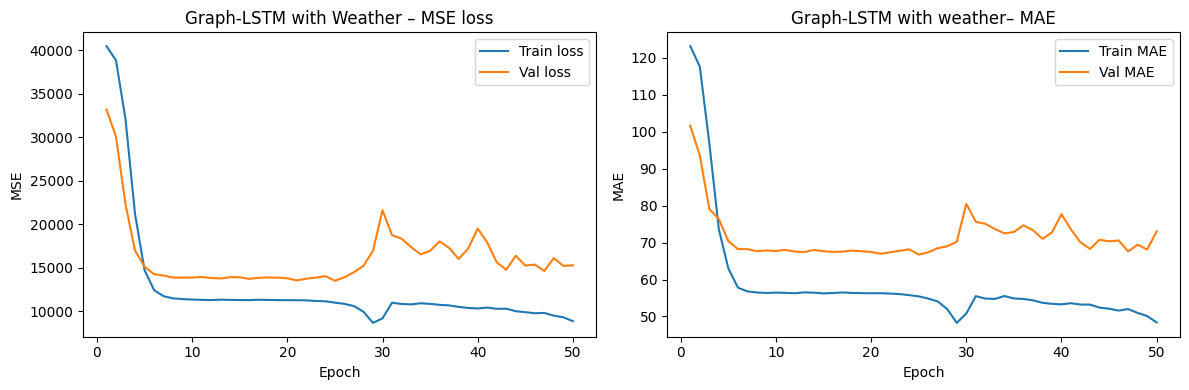

In [20]:
hist_g = history.history
epochs_g = range(1, len(hist_g["loss"]) + 1)

plt.figure(figsize=(12,4))

# Loss
plt.subplot(1,2,1)
plt.plot(epochs_g, hist_g["loss"], label="Train loss")
plt.plot(epochs_g, hist_g["val_loss"], label="Val loss")
plt.title("Graph-LSTM with Weather – MSE loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

# MAE
plt.subplot(1,2,2)
plt.plot(epochs_g, hist_g["mae"], label="Train MAE")
plt.plot(epochs_g, hist_g["val_mae"], label="Val MAE")
plt.title("Graph-LSTM with weather– MAE")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()

plt.tight_layout()
plt.show()


## 9.Predicting using the Model

In [21]:
recent_demand = demand_matrix.iloc[-6:].values.astype("float32")
recent_neighbor = (A_hat @ recent_demand.T).T
recent_weather = weather_aligned.iloc[-6:].values.astype("float32")

X_future = np.concatenate(
    [recent_demand, recent_neighbor, recent_weather],
    axis=1
).reshape(1, 6, X.shape[2])

pred = graph_weather_lstm_model.predict(X_future)[0]

print(pred[:10])   



1/1 [==============================] - 1s 920ms/step
[  2.5185213    0.51063466  79.07605    119.46714     11.039631
  22.914364   340.57553      0.67884004  33.505062   111.94029   ]


In [22]:
def describe_demand(zone_id, demand):
    # Clip negatives to 0
    demand = max(0, float(demand))

    # Categorize demand level
    if demand >= 300:
        level = "a very high-demand zone"
    elif demand >= 100:
        level = "a high-demand zone"
    elif demand >= 30:
        level = "a moderate-demand zone"
    elif demand >= 10:
        level = "a low-to-moderate demand zone"
    else:
        level = "a low-demand zone"

    demand_int = round(demand)

    return f"Zone {zone_id} is {level}, with approximately {demand_int} taxi pickups expected in the next hour."


In [23]:

for zone_id in range(1, 11):
    demand = pred[zone_id - 1]
    print(describe_demand(zone_id, demand))

Zone 1 is a low-demand zone, with approximately 3 taxi pickups expected in the next hour.
Zone 2 is a low-demand zone, with approximately 1 taxi pickups expected in the next hour.
Zone 3 is a moderate-demand zone, with approximately 79 taxi pickups expected in the next hour.
Zone 4 is a high-demand zone, with approximately 119 taxi pickups expected in the next hour.
Zone 5 is a low-to-moderate demand zone, with approximately 11 taxi pickups expected in the next hour.
Zone 6 is a low-to-moderate demand zone, with approximately 23 taxi pickups expected in the next hour.
Zone 7 is a very high-demand zone, with approximately 341 taxi pickups expected in the next hour.
Zone 8 is a low-demand zone, with approximately 1 taxi pickups expected in the next hour.
Zone 9 is a moderate-demand zone, with approximately 34 taxi pickups expected in the next hour.
Zone 10 is a high-demand zone, with approximately 112 taxi pickups expected in the next hour.


In [24]:
import numpy as np

def show_zone_demand(zone_ids, predictions):
   
    
    preds = np.asarray(predictions).astype(float)
    n_zones = preds.shape[0]

    
    if isinstance(zone_ids, (int, str)):
        zone_ids = [zone_ids]

   
    for zid in zone_ids:
        zid_int = int(zid)

        
        if zid_int < 1 or zid_int > n_zones:
            print(f"Zone {zid_int} is out of range. Valid zone IDs: 1 to {n_zones}.")
            continue

        demand = preds[zid_int - 1]  
        print(describe_demand(zid_int, demand))


In [25]:


show_zone_demand(1, pred)           
print("-------------------------------------------")
show_zone_demand([1, 3, 7, 10], pred)  
print("-------------------------------------------")
show_zone_demand(range(1, 11), pred)   


Zone 1 is a low-demand zone, with approximately 3 taxi pickups expected in the next hour.
-------------------------------------------
Zone 1 is a low-demand zone, with approximately 3 taxi pickups expected in the next hour.
Zone 3 is a moderate-demand zone, with approximately 79 taxi pickups expected in the next hour.
Zone 7 is a very high-demand zone, with approximately 341 taxi pickups expected in the next hour.
Zone 10 is a high-demand zone, with approximately 112 taxi pickups expected in the next hour.
-------------------------------------------
Zone 1 is a low-demand zone, with approximately 3 taxi pickups expected in the next hour.
Zone 2 is a low-demand zone, with approximately 1 taxi pickups expected in the next hour.
Zone 3 is a moderate-demand zone, with approximately 79 taxi pickups expected in the next hour.
Zone 4 is a high-demand zone, with approximately 119 taxi pickups expected in the next hour.
Zone 5 is a low-to-moderate demand zone, with approximately 11 taxi pickups